# Pymaceuticals Inc.
---

### Analysis
# Squamous Cell Carcinoma (SCC) Tumor Volume Reduction
The line plot showed the mean tumor volume over time for each treatment regimen. Mice treated with Capomulin demonstrated a significant reduction in tumor volume over the 45-day period. Compared to other drug regimens, Capomulin consistently maintained lower average tumor volumes.

# Consistency and Variability of Treatment Effects
The summary statistics table highlights the mean, median, variance, standard deviation, and standard error of tumor volumes for each regimen at different timepoints. Capomulin shows lower variance and standard deviation in tumor volumes compared to other drugs, indicating more consistent outcomes across the test subjects.
The lower variability in tumor volumes for Capomulin-treated mice indicates that Capomulin can reduce tumor size effectively and it can be closely investigated.

# Correlation and Regression
A significant positive correlation between mouse weight and tumor volume suggests that heavier mice tend to develop larger tumors when treated with Capomulin. This relationship indicated that mouse weight as an indicator in the effectiveness of the drug.
The regression analysis provides a model to predict tumor volume based on mouse weight. It indicates the variability in tumor volume, which can understand how weight influences tumor growth under Capomulin treatment. This information is crucial for optimizing treatment plans and dosages in future studies.

Inference:
Capomulin is an effective drug regimen for reducing tumor size in mice with SCC tumors. Its consistent performance and significant impact on tumor volume promote further research and development in cancer treatment. Further studies should focus on understanding the pharmaceutical and pharmacokinetic mechanisms of Capomulin, optimizing dosage, and evaluating long-term effects to ensure its safety and efficacy in clinical settings.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# combined_data = study_results.merge(mouse_metadata, how='left')
combined_data = pd.merge(study_results, mouse_metadata, how='left')

# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_numbers = combined_data['Mouse ID'].nunique()
print(mice_numbers)

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Identify duplicate rows based on Mouse ID and Timepoint
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the Duplicate Mouse IDs
duplicate_mouse_id = duplicate_mice['Mouse ID'].unique()
np.array(duplicate_mouse_id)

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data['Mouse ID'] == duplicate_mouse_id[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = combined_data['Mouse ID'] == duplicate_mouse_id[0]

cleaned_data = combined_data.drop(index=combined_data[mask].index)
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
cleaned_data[cleaned_data['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_new_numbers = cleaned_data['Mouse ID'].nunique()
print(mice_new_numbers)

248


## Summary Statistics

In [9]:
# Group the DataFrame by the 'Drug Regimen' column
grouped_data = cleaned_data.groupby('Drug Regimen')

# Calculate the mean, median, variance, standard deviation, and standard error of the mean of Tumor Volume
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_data['Tumor Volume (mm3)'].sem()

# Combine all results into a single DataFrame
calculated_stats = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume Std. Err.': sem_tumor_volume
})

# Reset Index to make 'Drug Regimen' a column
calculated_stats.reset_index(inplace=False)

# Display the final stats
calculated_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats = cleaned_data.groupby('Drug Regimen').agg({
    'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
})

# Display the final stats without customised header
summary_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

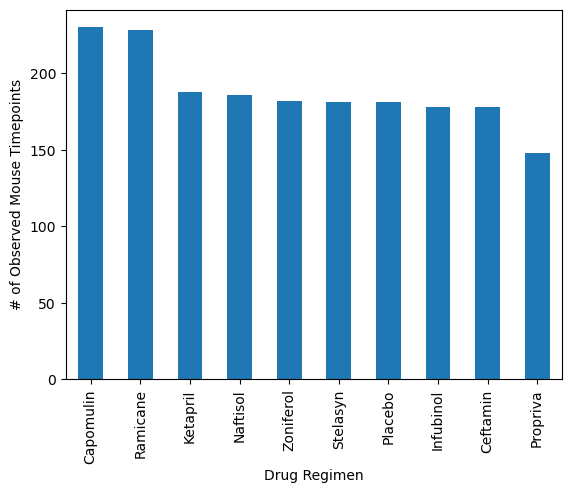

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data = cleaned_data['Drug Regimen'].value_counts()

# Bar chart using Pandas
bar_data.plot(kind='bar')
# plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

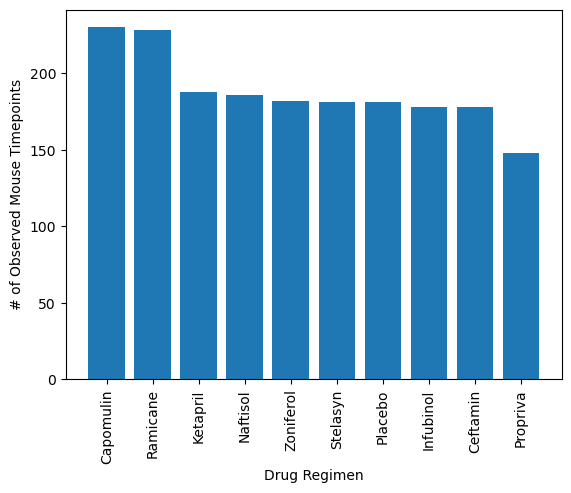

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar_data.index, bar_data.values)

# plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

plt.show()

In [13]:
gender_counts = cleaned_data['Sex'].value_counts()

# Calculate cleaned data percentages
total_mice = gender_counts.sum()
male_percentage = (gender_counts['Male'] / total_mice) * 100
female_percentage = (gender_counts['Female'] / total_mice) * 100

male_percentage, female_percentage

(50.95744680851064, 49.04255319148936)

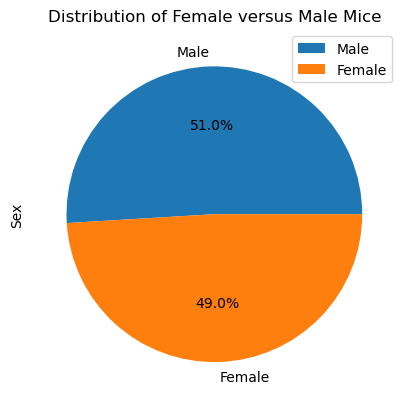

In [15]:
# Create the first pie chart with the Pandas DataFrame.plot() method.
gender_data = cleaned_data['Sex'].value_counts()

# Pie chart using Pandas
gender_data.plot(kind='pie', autopct='%1.1f%%', legend=True, ylabel='Sex', title='Distribution of Female versus Male Mice')
plt.show()

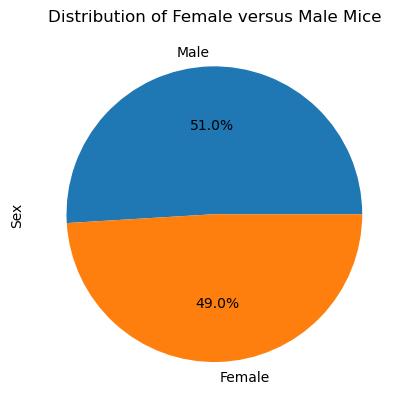

In [16]:
# Create the second pie chart with Matplotlib's pyplot methods.
plt.pie(gender_data, labels=gender_data.index, autopct='%1.1f%%')
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('Sex')

plt.show()

# Quartiles, Find Outliers, and Create a Box Plot

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


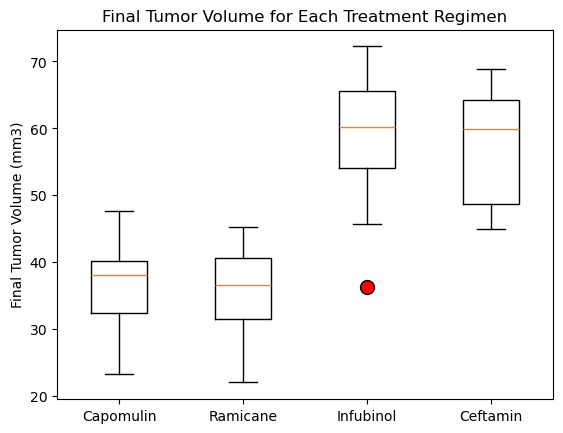

In [17]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Step 1: Calculate the final tumor volume for each mouse across four treatment regimens
# Get the last (greatest) timepoint for each mouse
grouped_data = cleaned_data.groupby('Mouse ID').agg({'Timepoint': 'max'}).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(grouped_data, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Verify the merged data
# print("Merged Data Sample:")
# print(merged_data.head())

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Step 2: Prepare the list for plotting and identify potential outliers
# Put treatments into a list for a loop and calculate IQR to determine potential outliers (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data and for plotting
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    final_tumor_vol = merged_data[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_data.append(final_tumor_vol)

    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    # print(f"\n{drug} Quartiles:")
    # print(quartiles)
    
    # Determine outliers using upper and lower bounds
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    
    print(f"{drug}'s potential outliers: {outliers}")

# Step 3: Generate a box plot that shows the distribution of the tumor volume for each treatment group
flierprops = dict(marker='o', markerfacecolor='r', markersize=10, linestyle='none')  # Customize outlier appearance
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatments, flierprops=flierprops)

# Highlight the outlier in Infubinol with a red dot
outlier_value = 36.321346

ax.set_title('Final Tumor Volume for Each Treatment Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

In [18]:
cleaned_data[cleaned_data['Mouse ID'] == 'l509']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


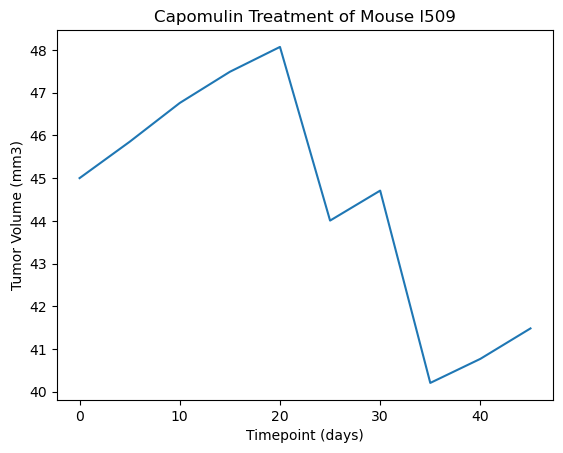

In [19]:
# Select a single mouse treated with Capomulin
mouse_id = 'l509'  # Replace with an appropriate Mouse ID treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Mouse ID'] == mouse_id]

# Line plot
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])
plt.title(f'Capomulin Treatment of Mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


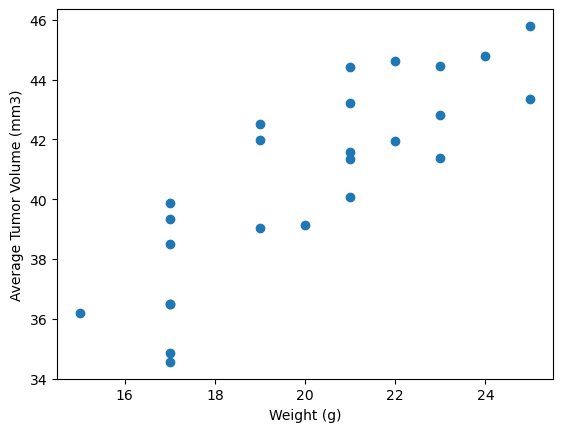

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group by Mouse ID and calculate average tumor volume and weight for Capomulin treatment
capomulin_grouped = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID').mean('Tumor Volume (mm3)')

# Scatter plot
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
# plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [21]:
capomulin_grouped.corr()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Timepoint,1.000000,-0.116552,0.443939,-0.352502,-0.256449
Tumor Volume (mm3),-0.116552,1.000000,-0.099062,0.015190,0.841936
Metastatic Sites,0.443939,-0.099062,1.000000,-0.074090,-0.218440
Age_months,-0.352502,0.015190,-0.074090,1.000000,-0.074396
Weight (g),-0.256449,0.841936,-0.218440,-0.074396,1.000000


The correlation between mouse weight and the average tumor volume is 0.84


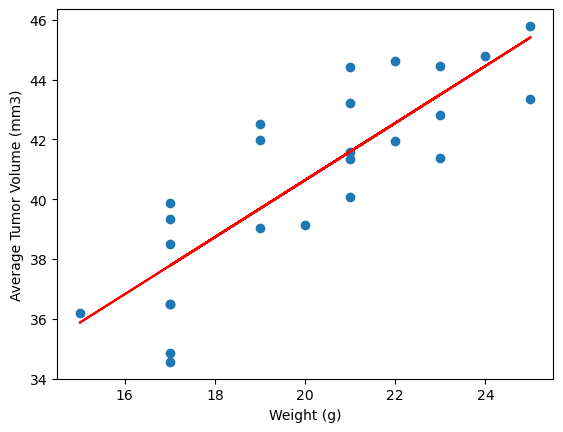

In [22]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

from scipy.stats import linregress

# Calculate correlation coefficient
corr_matrix = capomulin_grouped.corr()
print(f"The correlation between mouse weight and the average tumor volume is {corr_matrix.loc['Weight (g)', 'Tumor Volume (mm3)'].round(2)}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

# Scatter plot with regression line
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])
plt.plot(capomulin_grouped['Weight (g)'], slope * capomulin_grouped['Weight (g)'] + intercept, color='red')
# plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
